In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import OneHotEncoder



In [4]:
# Load the dataset
data = pd.read_csv('/content/employee_attrition_dataset.csv')

# Initial exploration
print(data.head())  # Display first few rows of the dataset
print(data.info())  # General information about the dataset
print(data.describe())  # Statistical summary for numerical columns


   EmployeeID  Age  Gender MaritalStatus    Education Department     JobRole  \
0           1   54    Male        Single          PhD      Sales     Analyst   
1           2   47    Male       Married       Master    Finance  Technician   
2           3   41  Female       Married       Master      Sales     Manager   
3           4   29    Male      Divorced  High School         IT     Manager   
4           5   37  Female      Divorced  High School         IT   Developer   

   YearsAtCompany  YearsInCurrentRole  MonthlyIncome  JobSatisfaction  \
0              17                  12       19618.16                2   
1              32                   7        7958.49                4   
2              37                   7       10839.85                3   
3               3                  18       14488.44                5   
4              25                  12        9591.07                3   

   WorkLifeBalance  TrainingTimesLastYear OverTime  DistanceFromHome Attrition  

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
EmployeeID               0
Age                      0
Gender                   0
MaritalStatus            0
Education                0
Department               0
JobRole                  0
YearsAtCompany           0
YearsInCurrentRole       0
MonthlyIncome            0
JobSatisfaction          0
WorkLifeBalance          0
TrainingTimesLastYear    0
OverTime                 0
DistanceFromHome         0
Attrition                0
dtype: int64


In [6]:

# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [7]:

# Handle missing values
# Fill numeric columns with mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


In [8]:

# Fill categorical columns with mode (most frequent value)
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [9]:

# Verify if missing values are handled
missing_values_after = data.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)


Missing values after handling:
EmployeeID               0
Age                      0
Gender                   0
MaritalStatus            0
Education                0
Department               0
JobRole                  0
YearsAtCompany           0
YearsInCurrentRole       0
MonthlyIncome            0
JobSatisfaction          0
WorkLifeBalance          0
TrainingTimesLastYear    0
OverTime                 0
DistanceFromHome         0
Attrition                0
dtype: int64


In [10]:

# Detect and remove outliers using Z-Score
z_scores = np.abs(stats.zscore(data[numeric_cols]))
threshold = 3
data_zscore_filtered = data[(z_scores < threshold).all(axis=1)]
print(f"\nData shape after removing outliers using Z-Score: {data_zscore_filtered.shape}")


Data shape after removing outliers using Z-Score: (5000, 16)


In [11]:
# Detect and remove outliers using IQR (Interquartile Range)
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_iqr_filtered = data[~((data[numeric_cols] < lower_bound) | (data[numeric_cols] > upper_bound)).any(axis=1)]
print(f"\nData shape after removing outliers using IQR: {data_iqr_filtered.shape}")




Data shape after removing outliers using IQR: (5000, 16)


In [12]:
# Convert categorical variables to numerical using One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("\nData after One-Hot Encoding:")
print(data_encoded.head())



Data after One-Hot Encoding:
   EmployeeID  Age  YearsAtCompany  YearsInCurrentRole  MonthlyIncome  \
0           1   54              17                  12       19618.16   
1           2   47              32                   7        7958.49   
2           3   41              37                   7       10839.85   
3           4   29               3                  18       14488.44   
4           5   37              25                  12        9591.07   

   JobSatisfaction  WorkLifeBalance  TrainingTimesLastYear  DistanceFromHome  \
0                2                3                      3             27.77   
1                4                2                      9             43.56   
2                3                2                      2             25.76   
3                5                2                      4             25.11   
4                3                1                      7              2.87   

   Gender_Male  ...  Department_HR  Department_IT 

In [13]:
# Final check on the dataset after preprocessing
print("\nFinal data shape after preprocessing:")
print(data_encoded.shape)


Final data shape after preprocessing:
(5000, 25)


In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [15]:
from sklearn.preprocessing import StandardScaler

# Selecting continuous variables for scaling
continuous_vars = ['Age', 'YearsAtCompany', 'YearsInCurrentRole', 'MonthlyIncome', 'DistanceFromHome']

# Standardizing the continuous variables
scaler = StandardScaler()
data[continuous_vars] = scaler.fit_transform(data[continuous_vars])

# Display the scaled data
print("\nData after feature scaling:")
print(data[continuous_vars].head())



Data after feature scaling:
        Age  YearsAtCompany  YearsInCurrentRole  MonthlyIncome  \
0  0.886935       -0.270644            0.375351       1.645854   
1  0.319343        1.046315           -0.534723      -0.577295   
2 -0.167164        1.485301           -0.534723      -0.027906   
3 -1.140178       -1.499805            1.467439       0.667770   
4 -0.491502        0.431734            0.375351      -0.266011   

   DistanceFromHome  
0          0.148631  
1          1.262135  
2          0.006887  
3         -0.038951  
4         -1.607306  


In [16]:
# Ensure 'Department' and 'YearsAtCompany' are in the dataset
if 'Department' in data.columns and 'YearsAtCompany' in data.columns:
    # Calculate average tenure per department
    department_avg_tenure = data.groupby('Department')['YearsAtCompany'].mean().reset_index()
    department_avg_tenure.columns = ['Department', 'AvgTenurePerDepartment']

    # Merge this new feature back into the dataset
    data = pd.merge(data, department_avg_tenure, on='Department', how='left')

    # Display the new feature
    print("\nData with new feature 'AvgTenurePerDepartment':")
    print(data[['Department', 'YearsAtCompany', 'AvgTenurePerDepartment']].head())



Data with new feature 'AvgTenurePerDepartment':
  Department  YearsAtCompany  AvgTenurePerDepartment
0      Sales       -0.270644               -0.001479
1    Finance        1.046315                0.032360
2      Sales        1.485301               -0.001479
3         IT       -1.499805                0.008047
4         IT        0.431734                0.008047


In [17]:
from sklearn.decomposition import PCA

# Define the number of principal components to retain (let's use 2 for simplicity)
pca = PCA(n_components=2)

# Perform PCA on the scaled data (excluding categorical columns)
continuous_vars_scaled = data[continuous_vars]
pca_components = pca.fit_transform(continuous_vars_scaled)

# Add PCA components back to the dataset
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

# Display the first few rows with the PCA components
print("\nData with PCA components:")
print(data[['PCA1', 'PCA2']].head())



Data with PCA components:
       PCA1      PCA2
0  0.780353 -0.064055
1 -1.135286  1.410780
2  0.050501  1.241036
3  1.259305 -0.990052
4  1.031785 -0.556676


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with the necessary preprocessing done
# First, ensure that categorical variables are encoded
X = data.drop(columns=['EmployeeID', 'Attrition'])  # Features
y = data['Attrition'].map({'Yes': 1, 'No': 0})  # Target variable (binary)

# One-Hot Encoding for categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the sizes of the training and testing sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 4000
Testing set size: 1000


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.55      0.53       485
           1       0.53      0.48      0.51       515

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       485
           1       0.55      0.55      0.55       515

    accuracy                           0.54      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.53      0.54      0.53      1000


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.52       485
           1       0.54      0.51      0.52       515

    accuracy                           0.52      1000
   macro

In [20]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Set up Grid Search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("\nBest parameters for Random Forest:")
print(grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("\nBest Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))



Best parameters for Random Forest:
{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.5142

Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51       485
           1       0.53      0.51      0.52       515

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000



                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression     0.517   0.534483  0.481553  0.506639  0.523131
Decision Tree           0.544   0.556840  0.561165  0.558994  0.543469
Random Forest           0.490   0.505219  0.469903  0.486922  0.492459
Gradient Boosting       0.537   0.555085  0.508738  0.530902  0.529026


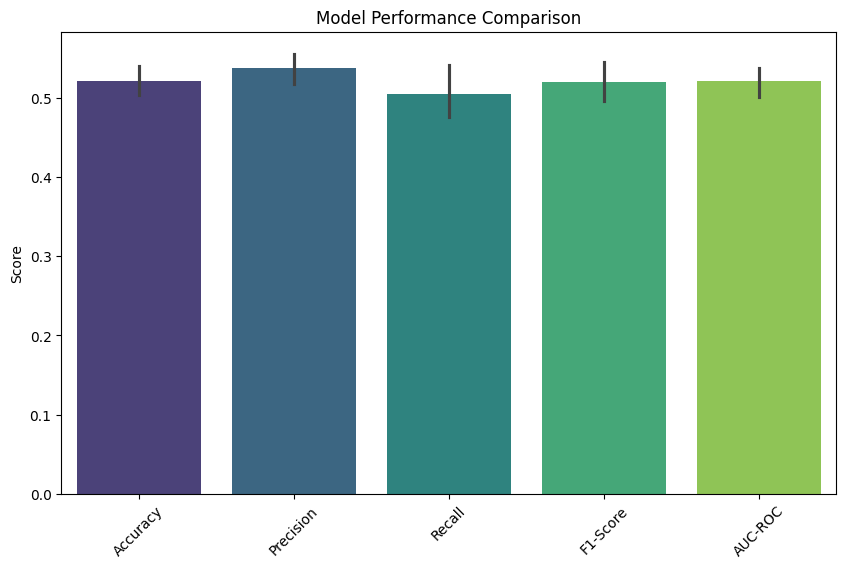

<ipython-input-22-12202a48fa90>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette="viridis")


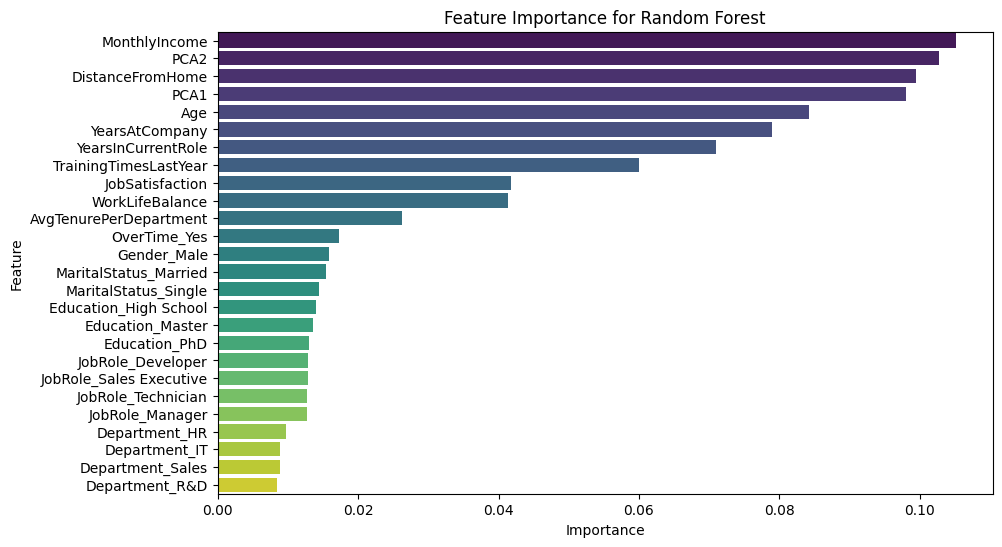

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Store metrics for comparison
model_performance = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_prob)

    # Store the results
    model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc
    }

# Convert the performance dictionary to a DataFrame for easier visualization
performance_df = pd.DataFrame(model_performance).T

# Print the performance metrics
print(performance_df)

# Visualize model performance
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, palette="viridis")
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Feature importance for Random Forest and Gradient Boosting
best_model = 'Random Forest'  # Replace with the model you choose
if best_model == 'Random Forest':
    feature_importance = models[best_model].feature_importances_
elif best_model == 'Gradient Boosting':
    feature_importance = models[best_model].feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette="viridis")
plt.title('Feature Importance for ' + best_model)
plt.show()


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Example employee data
employee_data = {
    'Age': 35,
    'Gender': 'Female',
    'MaritalStatus': 'Married',
    'Education': 'Bachelor',
    'Department': 'IT',
    'JobRole': 'Developer',
    'YearsAtCompany': 5,
    'YearsInCurrentRole': 3,
    'MonthlyIncome': 5000,
    'JobSatisfaction': 4,
    'WorkLifeBalance': 3,
    'TrainingTimesLastYear': 2,
    'OverTime': 'No',
    'DistanceFromHome': 10
}

# Create a DataFrame for the employee
employee_df = pd.DataFrame([employee_data])

# Preprocess the data (same steps as training)
employee_df = pd.get_dummies(employee_df, drop_first=True)

# Ensure the DataFrame has the same feature columns as the training set
missing_cols = set(X_train.columns) - set(employee_df.columns)
for col in missing_cols:
    employee_df[col] = 0  # Add missing columns with default value

# Reorder columns to match the training set
employee_df = employee_df[X_train.columns]

# Standardize the continuous features
scaler = StandardScaler()
employee_df_scaled = scaler.fit_transform(employee_df)

# Make a prediction
prediction = models['Random Forest'].predict(employee_df_scaled)

# Map the prediction back to original labels
result = 'Yes' if prediction[0] == 1 else 'No'
print(f"Will the employee leave the organization? {result}")


Will the employee leave the organization? Yes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your original DataFrame containing employee information
data_original = data.copy()

# Print column names to verify the presence of an employee identifier
print("Columns in the DataFrame:", data.columns)

# Check for the presence of an employee identifier (assuming it's not 'EmployeeID')
employee_identifier = 'EmployeeID'  # Change this if your DataFrame has a different identifier
if employee_identifier not in data.columns:
    # If 'EmployeeID' is not found, we need to decide on an alternative identifier
    # For now, we will just show the DataFrame without an ID
    employee_identifier = None

# Drop the target variable if it exists
if 'Attrition' in data.columns:
    data_encoded = pd.get_dummies(data.drop(columns=['Attrition']), drop_first=True)
else:
    data_encoded = pd.get_dummies(data, drop_first=True)  # Encode without dropping if 'Attrition' is missing

# Ensure the DataFrame has the same feature columns as the training set
missing_cols = set(X_train.columns) - set(data_encoded.columns)
for col in missing_cols:
    data_encoded[col] = 0  # Add missing columns with default value

# Reorder columns to match the training set
data_encoded = data_encoded[X_train.columns]

# Standardize the continuous features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Make predictions for all employees
predictions = models['Random Forest'].predict(data_scaled)

# Add predictions to the original DataFrame
data_original['Attrition Prediction'] = ['Yes' if pred == 1 else 'No' for pred in predictions]

# Display the DataFrame with predictions
if employee_identifier and employee_identifier in data_original.columns:
    print(data_original[[employee_identifier, 'Attrition Prediction']])
else:
    print(data_original[['Attrition Prediction']])


Columns in the DataFrame: Index(['EmployeeID', 'Age', 'Gender', 'MaritalStatus', 'Education',
       'Department', 'JobRole', 'YearsAtCompany', 'YearsInCurrentRole',
       'MonthlyIncome', 'JobSatisfaction', 'WorkLifeBalance',
       'TrainingTimesLastYear', 'OverTime', 'DistanceFromHome', 'Attrition',
       'AvgTenurePerDepartment', 'PCA1', 'PCA2'],
      dtype='object')
      EmployeeID Attrition Prediction
0              1                   No
1              2                   No
2              3                  Yes
3              4                  Yes
4              5                  Yes
...          ...                  ...
4995        4996                   No
4996        4997                  Yes
4997        4998                   No
4998        4999                  Yes
4999        5000                  Yes

[5000 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
